In [131]:
# import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [132]:
# Read data
df= pd.read_excel('climate_change_download_0.xls')
df.head(5)

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [133]:
df.shape

(13512, 28)

In [155]:
df["Country name"].value_counts(),df["Series name"].unique().shape

(Aruba                             58
 Nepal                             58
 Mauritius                         58
 Malawi                            58
 Malaysia                          58
                                   ..
 Greenland                         58
 Guatemala                         58
 Guam                              58
 Zimbabwe                          58
 Small island developing states    56
 Name: Country name, Length: 233, dtype: int64,
 (58,))

In [165]:
df["Series name"].unique().tolist()

['Land area below 5m (% of land area)',
 'Agricultural land under irrigation (% of total ag. land)',
 'Cereal yield (kg per hectare)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Access to electricity (% of total population)',
 'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
 'Energy use per capita (kilograms of oil equivalent)',
 'CO2 emissions, total (KtCO2)',
 'CO2 emissions per capita (metric tons)',
 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
 'Other GHG emissions, total (KtCO2e)',
 'Methane (CH4) emissions, total (KtCO2e)',
 'Nitrous oxide (N2O) emissions, total (KtCO2e)',
 'Annex-I emissions reduction target',
 'Disaster risk reduction progress score (1-5 scale; 5=best)',
 'GHG net emissions/removals by LUCF (MtCO2e)',
 'Hosted Clean Development Mechanism (CDM) projects',
 'Hosted Joint Implementation (JI) projects',
 'Average annual precipitation (1961-1990, mm)',
 'Issued Certified Emission Reductions (CERs) from CDM (thousands)',


In [166]:
df.isnull().mean()*100

Country code     0.000000
Country name     0.000000
Series code      0.000000
Series name      0.000000
SCALE            0.000000
Decimals         0.000000
1990            64.076377
1991            74.119301
1992            72.964772
1993            72.491119
1994            72.032268
1995            65.423327
1996            71.847247
1997            72.121078
1998            71.743635
1999            70.359680
2000            59.325044
2001            70.263470
2002            69.974837
2003            70.078449
2004            68.731498
2005            62.374186
2006            68.650089
2007            68.561279
2008            65.933985
2009            72.165483
2010            82.741267
2011            84.177028
dtype: float64

In [134]:
# Change col type to string
col=df.columns.tolist()
col = [str(i) for i in col  ]
df.columns=col

In [135]:
num_col=df.columns[6:].tolist()
str_col = df.columns[0:6].tolist()
# We replace .. cells by NaN 
df=df.replace(['..'],np.nan)

In [204]:
temp= df[num_col+['Series name']]
groupby_df = temp.groupby(['Series name']).count()
groupby_df['Valeur manquante %'] = (groupby_df.sum(axis='columns') / df.shape[0])*100
groupby_df['Valeur manquante %'].to_frame().sort_values(by=['Valeur manquante %'], ascending= False)

# data_frame= pd.DataFrame({'Indicateur': df["Series name"].unique().tolist()})

# data_frame["Valeur nulle"] = groupby_df['total']

# data_frame

,Valeur manquante %
Series name,
Population,36.071640
Population growth (annual %),35.879218
Urban population,34.480462
Urban population growth (annual %),34.310243
"Under-five mortality rate (per 1,000)",32.637655
Nationally terrestrial protected areas (% of total land area),32.563647
GDP ($),32.171403
GNI per capita (Atlas $),30.439609
"Foreign direct investment, net inflows (% of GDP)",29.714328


<AxesSubplot:>

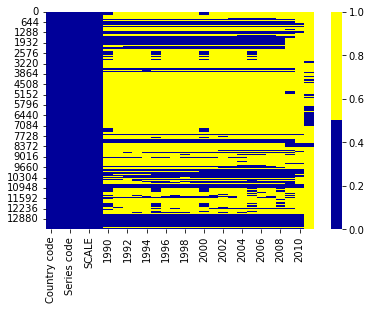

In [136]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[df.columns[:28]].isnull(), cmap=sns.color_palette(colours))

In [137]:
# Drop row with more than 50% missing value
# We have 28 Cols then we will drop row where 14 values are missings
df_clean=df[df.isna().sum(axis=1) <=21].copy()
df_clean.shape

(4055, 28)

<Figure size 720x432 with 0 Axes>

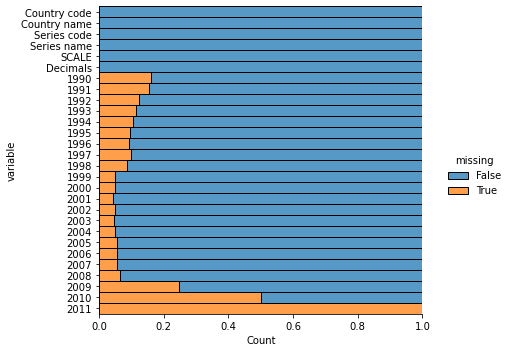

In [138]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_clean.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    
)

<Figure size 720x432 with 0 Axes>

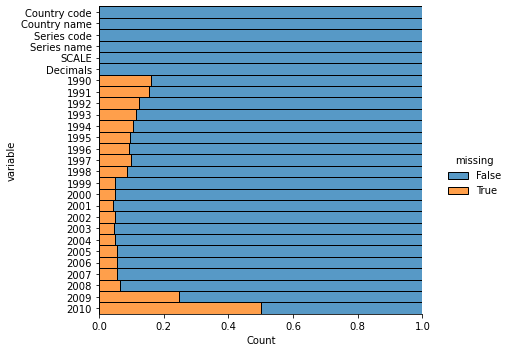

In [139]:
# we will drop colum 2011 since there is 100% of missing values
df_clean=df_clean.drop(columns='2011')
num_col=num_col[:-1]
plt.figure(figsize=(10,6))
sns.displot(
    data=df_clean.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    
)

In [140]:
# convert numeric col to numeric 
df_clean[num_col] = df_clean[num_col].apply(pd.to_numeric)
# Interpolate the NaN values 
df_num=df_clean[num_col].interpolate(axis=1,limit_direction='both',method='linear').copy()

<AxesSubplot:title={'center':'Percentage of Total Agricultural land under irrigation in Australia \n Before Interpolation'}>

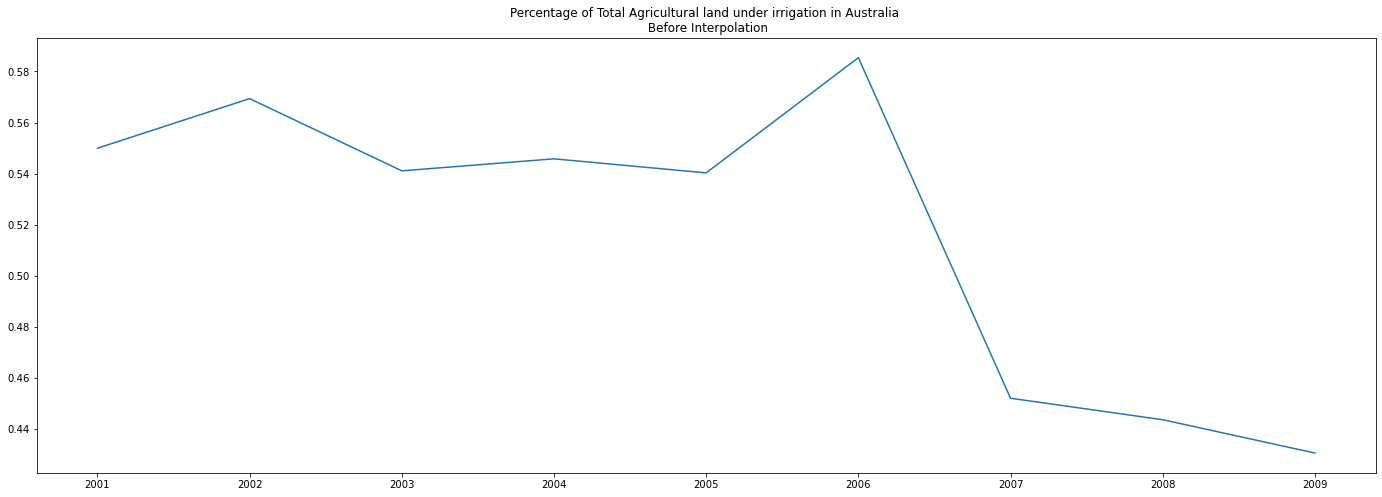

In [141]:
s = df_clean.iloc[1,6:]
s.plot.line(figsize =(24,8),title="Percentage of Total Agricultural land under irrigation in Australia \n Before Interpolation")

<AxesSubplot:title={'center':'Percentage of Total Agricultural land under irrigation in Australia \n After Interpolation'}>

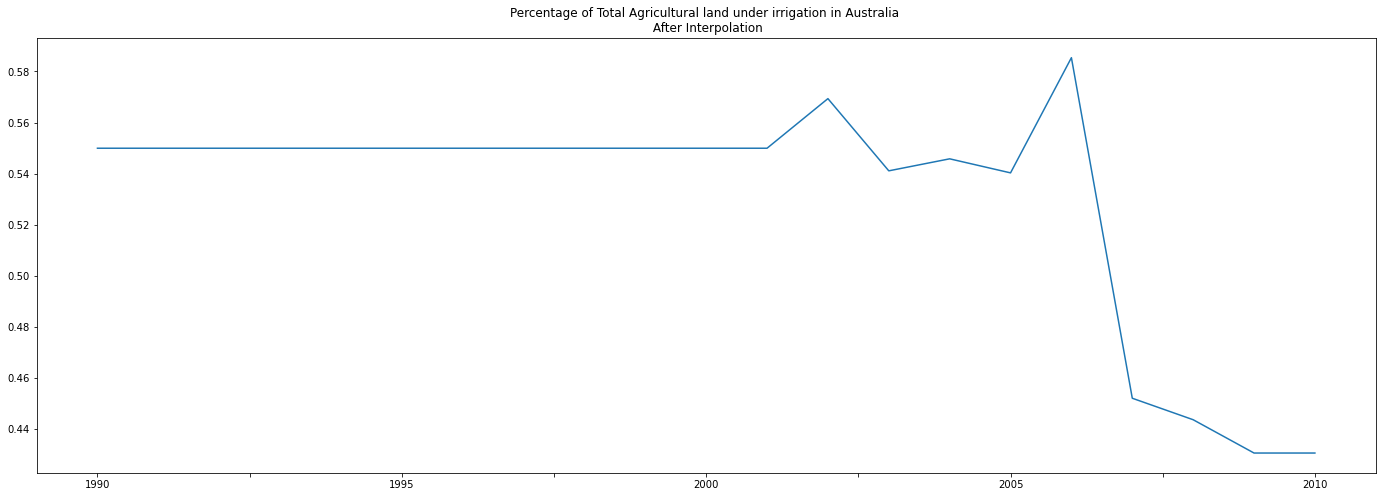

In [142]:
s = df_num.iloc[1]
s.plot.line(figsize =(24,8),title="Percentage of Total Agricultural land under irrigation in Australia \n After Interpolation")

In [143]:
# Functions 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def poly_regression(serie,val):

    X = serie.index.values
    X= [int(i) for i in X]
    X=np.array(X)
    X=X.reshape(-1, 1)

    y= serie.values
    y=y.reshape(-1, 1)

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    y_pred = pol_reg.predict(poly_reg.fit_transform(X))
    r2 = r2_score(y, y_pred)
    output=pol_reg.predict(poly_reg.fit_transform([[val]]))
    output=output.astype(float)
    return(output,r2)

    

In [144]:
predict_list=[]
r2_list=[]
for i in range(0, len(df_num)):
    serie = df_num.iloc[i]
    predict,r2=poly_regression(serie,2011)
    predict_list.append(predict)
    r2_list.append(r2)
    
predict_list=np.concatenate(predict_list).ravel().tolist()


In [145]:
df_num[2011]=predict_list
df_num['R2']=r2_list
df_num


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,R2
235,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,...,7.259298e+00,5.502361e+00,5.840148e+00,6.085466e+00,5.940385e+00,5.779478e+00,4.843049e+00,4.843049e+00,4.570784e+00,0.210871
243,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,...,5.410694e-01,5.457726e-01,5.402685e-01,5.853883e-01,4.519931e-01,4.435785e-01,4.305318e-01,4.305318e-01,3.662410e-01,0.791706
245,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,...,2.993269e+01,3.003786e+01,3.005464e+01,3.002523e+01,3.004626e+01,3.004626e+01,2.951440e+01,2.951440e+01,2.941044e+01,0.650945
255,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,...,1.268640e+00,1.272748e+00,1.273885e+00,1.239116e+00,1.244953e+00,5.943703e-01,5.264927e-01,5.264927e-01,1.758278e-01,0.847840
281,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.292994e+01,2.179487e+01,2.095808e+01,2.101911e+01,1.972789e+01,2.086957e+01,2.080000e+01,2.080000e+01,1.993319e+01,0.871870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,2.497176e+06,2.693642e+06,2.909756e+06,3.139637e+06,3.373930e+06,3.605265e+06,3.817581e+06,4.024281e+06,4.229363e+06,4.439791e+06,...,5.410331e+06,5.683412e+06,5.967458e+06,6.275723e+06,6.597265e+06,6.932789e+06,7.283068e+06,7.648699e+06,8.069306e+06,0.999922
13508,1.830400e+07,1.886488e+07,1.944609e+07,2.004848e+07,2.067294e+07,2.132040e+07,2.199214e+07,2.269759e+07,2.343868e+07,2.421743e+07,...,2.690436e+07,2.744822e+07,2.798869e+07,2.853356e+07,2.907984e+07,2.963688e+07,3.019380e+07,3.084463e+07,3.102368e+07,0.999200
13509,1.012093e+07,1.056945e+07,1.106005e+07,1.156863e+07,1.206149e+07,1.251513e+07,1.299062e+07,1.342856e+07,1.385204e+07,1.429650e+07,...,1.686783e+07,1.764085e+07,1.843199e+07,1.933373e+07,2.026144e+07,2.121648e+07,2.220185e+07,2.321996e+07,2.459121e+07,0.999548
13510,3.096861e+06,3.141668e+06,3.183257e+06,3.223515e+06,3.264940e+06,3.309118e+06,3.356932e+06,3.407476e+06,3.458431e+06,3.506648e+06,...,3.819641e+06,3.912871e+06,4.011828e+06,4.128987e+06,4.253139e+06,4.384859e+06,4.524564e+06,4.614728e+06,4.808880e+06,0.999074


In [146]:
df_final =df_clean[str_col].merge(df_num,left_index=True, right_index=True)
df_final

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,R2
235,AFG,Afghanistan,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,5.668424e+00,5.668424e+00,5.668424e+00,5.668424e+00,...,7.259298e+00,5.502361e+00,5.840148e+00,6.085466e+00,5.940385e+00,5.779478e+00,4.843049e+00,4.843049e+00,4.570784e+00,0.210871
243,AUS,Australia,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,5.499232e-01,5.499232e-01,5.499232e-01,5.499232e-01,...,5.410694e-01,5.457726e-01,5.402685e-01,5.853883e-01,4.519931e-01,4.435785e-01,4.305318e-01,4.305318e-01,3.662410e-01,0.791706
245,AZE,Azerbaijan,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,2.998946e+01,2.998946e+01,2.998946e+01,2.998946e+01,...,2.993269e+01,3.003786e+01,3.005464e+01,3.002523e+01,3.004626e+01,3.004626e+01,2.951440e+01,2.951440e+01,2.941044e+01,0.650945
255,BLR,Belarus,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,1.259860e+00,1.259860e+00,1.259860e+00,1.259860e+00,...,1.268640e+00,1.272748e+00,1.273885e+00,1.239116e+00,1.244953e+00,5.943703e-01,5.264927e-01,5.264927e-01,1.758278e-01,0.847840
281,CYP,Cyprus,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.292994e+01,2.179487e+01,2.095808e+01,2.101911e+01,1.972789e+01,2.086957e+01,2.080000e+01,2.080000e+01,1.993319e+01,0.871870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,YEM,"Yemen, Rep.",SP.URB.TOTL,Urban population,0,0,2.497176e+06,2.693642e+06,2.909756e+06,3.139637e+06,...,5.410331e+06,5.683412e+06,5.967458e+06,6.275723e+06,6.597265e+06,6.932789e+06,7.283068e+06,7.648699e+06,8.069306e+06,0.999922
13508,ZAF,South Africa,SP.URB.TOTL,Urban population,0,0,1.830400e+07,1.886488e+07,1.944609e+07,2.004848e+07,...,2.690436e+07,2.744822e+07,2.798869e+07,2.853356e+07,2.907984e+07,2.963688e+07,3.019380e+07,3.084463e+07,3.102368e+07,0.999200
13509,ZAR,"Congo, Dem. Rep.",SP.URB.TOTL,Urban population,0,0,1.012093e+07,1.056945e+07,1.106005e+07,1.156863e+07,...,1.686783e+07,1.764085e+07,1.843199e+07,1.933373e+07,2.026144e+07,2.121648e+07,2.220185e+07,2.321996e+07,2.459121e+07,0.999548
13510,ZMB,Zambia,SP.URB.TOTL,Urban population,0,0,3.096861e+06,3.141668e+06,3.183257e+06,3.223515e+06,...,3.819641e+06,3.912871e+06,4.011828e+06,4.128987e+06,4.253139e+06,4.384859e+06,4.524564e+06,4.614728e+06,4.808880e+06,0.999074


In [159]:
# Visualizing the Polymonial Regression results
def viz_polymonial(serie):
    X = serie.index.values
    X= [int(i) for i in X]
    X=np.array(X)
    X=X.reshape(-1, 1)

    y= serie.values
    y=y.reshape(-1, 1)

    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    
    pol_reg.fit(X_poly, y)
    plt.figure(figsize=(8,8))
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title(' Percentage of Total Agricultural land under irrigation in Australia (Polynomial regression)')
    plt.xlabel('Years')
    plt.ylabel('Percentage')
    plt.show()
    return


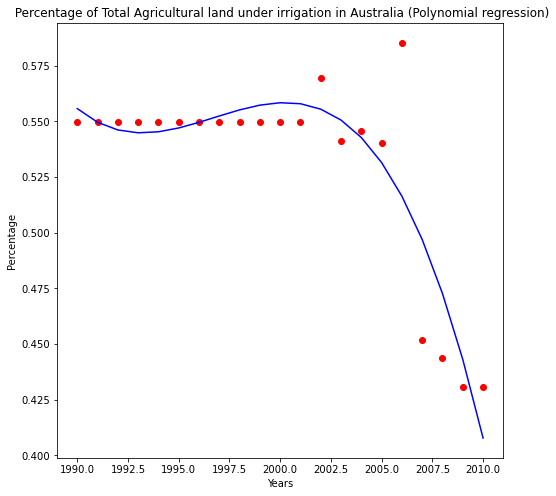

In [160]:
serie = df_num.iloc[1]
viz_polymonial(serie[:-2])


In [201]:
R2_mean=df_final['R2'].mean()
R2_mean

0.796446421275941